In [1]:
import warnings
warnings.simplefilter('ignore')

# Introduction

## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.<br>On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.<br>This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.<br>Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive.<br>In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Variable Notes

**pclass:** A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br>

**parch:** The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

# Load librairies

In [2]:
import pandas as pd # Data manipulation
import numpy as np # Data manipulation

import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation

# Load data

In [3]:
test = pd.read_csv("input/test.csv")
train = pd.read_csv("input/train.csv")

# Data Dictionary

|Variable|Definition|Key|
|---|---|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|
|Age|Age in years|
|sibsp|# of siblings / spouses aboard the Titanic|
|parch|# of parents / children aboard the Titanic|
|ticket|Ticket number|
|fare|Passenger fare|
|cabin|Cabin number|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

# File structure and content

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data set seems to not contain outliers.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Variables types seems normal

In [6]:
train.shape

(891, 12)

# individual features visualisations

## Survived

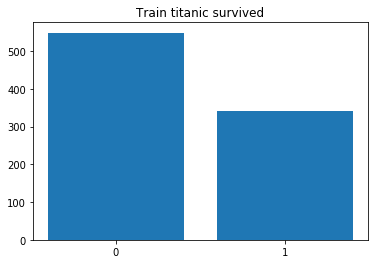

In [7]:
# Label of survived categorie
label = train.Survived.value_counts().index

# ndarray of labels & and count of occurence of each labels
index = np.arange(len(label))
num_survived = train.Survived.value_counts()

# Create bars
plt.bar(index, num_survived)
 
# Create names on the x-axis
plt.xticks(index, label)

# Title of the plot
plt.title('Train titanic survived')
 
# Show graphic
plt.show()

In [8]:
train['Survived'].isnull().sum()

0

There are **342** passenger who survived to the sinking. And **549** who not survived.

There is no missing value

## Pclass

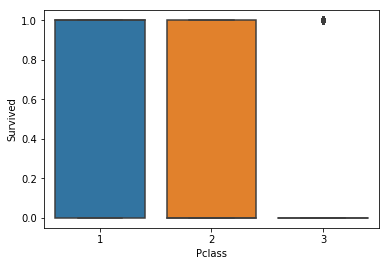

In [9]:
# Make boxplot
sns.boxplot(x=train['Pclass'], y=train['Survived'])
plt.show()

In [10]:
train[train['Pclass'] == 3].Survived.value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [11]:
train[train['Pclass'] == 2].Survived.value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [12]:
train[train['Pclass'] == 1].Survived.value_counts()

1    136
0     80
Name: Survived, dtype: int64

We can observe than Pclass 3 passengers have a higher ratio of death than other Pclass. <br>
Pclass 1 passenger have more chance to survive than other passenger.

## Sex

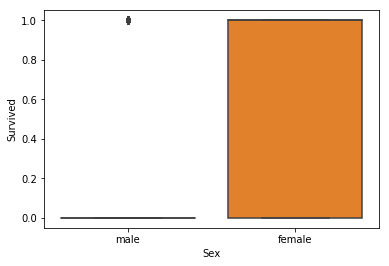

In [13]:
# Make boxplot
sns.boxplot(x=train['Sex'], y=train['Survived'])
plt.show()

In [14]:
train[train['Sex'] == 'male'].Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [15]:
train[train['Sex'] == 'female'].Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

Female passenger have more chance to survive than male passenger.

## Age

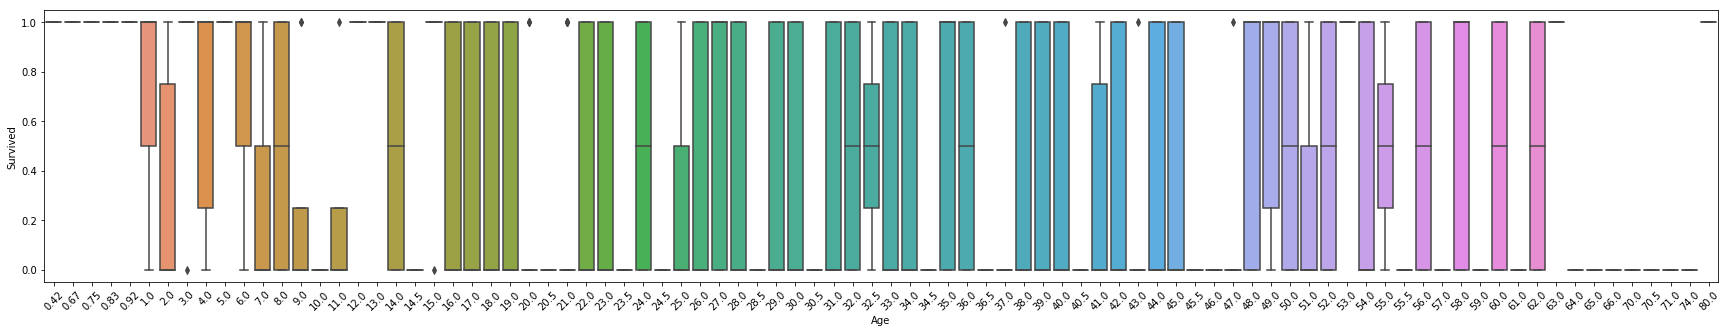

In [16]:
# Make boxplot
plt.figure(figsize=(30,5))
plt.xticks(rotation='45')
sns.boxplot(x=train['Age'], y=train['Survived'])
plt.show()

We can observe that passenger have age in float type. This is not a normal age format. we will need to handle this in floowing parts. 

We can obserse young passengers have more chance to survive than others.

## SibSp

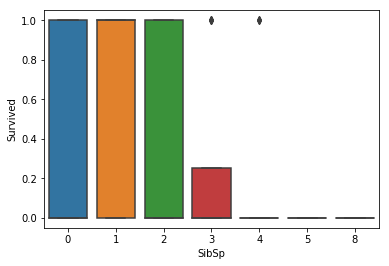

In [17]:
# Make boxplot
sns.boxplot(x=train['SibSp'], y=train['Survived'])
plt.show()

Passengers with more than 2 SibSp on board have less chances to survive. 

## Parch

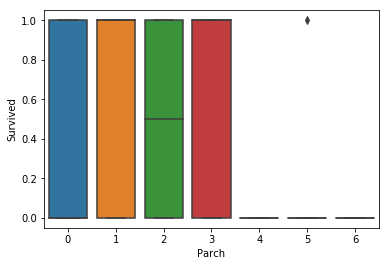

In [18]:
# Make boxplot
sns.boxplot(x=train['Parch'], y=train['Survived'])
plt.show()

Passenger with more than 3 parents or child on board have less chances to survive.

## fare

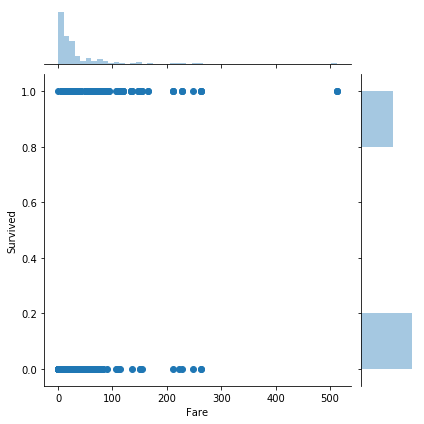

In [19]:
# Make jointplot
sns.jointplot(x=train['Fare'], y=train['Survived'])
plt.show()

In [20]:
train[train['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Fare does not seems to have an impact on the passengers probability to survived.<br>
But we can observe 3 passenger had bought most expensive ticket and all survived. 

## Embarked

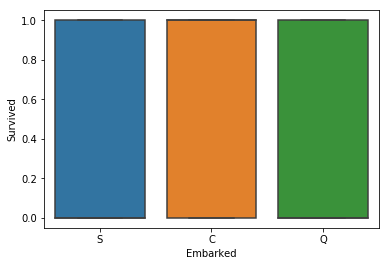

In [21]:
# Make boxplot
sns.boxplot(x=train['Embarked'], y=train['Survived'])
plt.show()

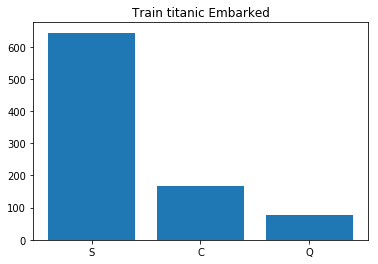

In [22]:
# Label of Embarked categorie
label = train.Embarked.value_counts().index

# ndarray of labels & and count of occurence of each labels
index = np.arange(len(label))
num_Embarked = train.Embarked.value_counts()

# Create bars
plt.bar(index, num_Embarked)
 
# Create names on the x-axis
plt.xticks(index, label)

# Title of the plot
plt.title('Train titanic Embarked')
 
# Show graphic
plt.show()

Embarked correspond to the port of Embarkation:
- C = Cherbourg
- Q = Queenstown
- S = Southampton

Most of peolpe embarked in Southampton **(644)**, **68** in Cherbourg and **77** in Queenstown. 

The port of embarkation of passengers does not seems to have an impact on the passenger probability to survived. 

# Data Preparation train dataset

In [23]:
data = [train, test]

## Add new column

### Title 

In [24]:
for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract(r'([A-Za-z]+)\.')

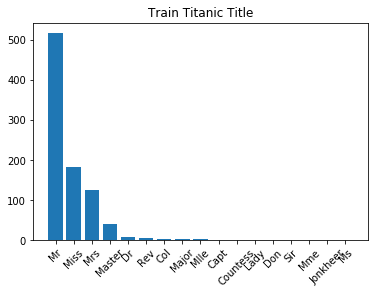

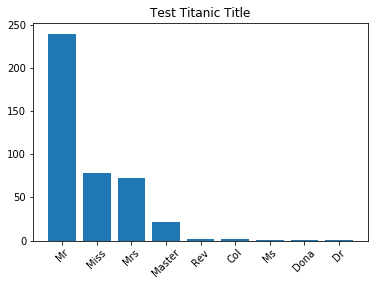

In [25]:
i = 0
for dataset in data:
    
    Title_msg = ["Train Titanic Title", "Test Titanic Title"]
    
    # Label of Embarked categorie
    label = dataset.Title.value_counts().index

    # ndarray of labels & and count of occurence of each labels
    index = np.arange(len(label))
    num_Title = dataset.Title.value_counts()

    # Create bars
    plt.bar(index, num_Title)

    # Create names on the x-axis
    plt.xticks(index, label, rotation ='45')
    
    # Title of the plot
    plt.title(Title_msg[i])

    # Show graphic
    plt.show()
    
    i += 1


There are a lot of different Title. Need to be simplify

In [26]:
for dataset in data:
    dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady', 'Dona','Countess','Jonkheer','Col',
                              'Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs', 'Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

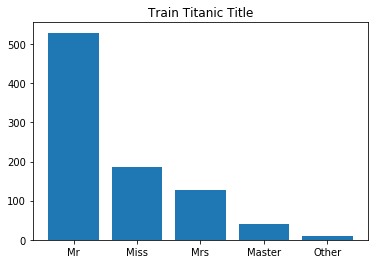

In [27]:
# Label of Title categorie
label = train.Title.value_counts().index

# ndarray of labels & and count of occurence of each labels
index = np.arange(len(label))
num_Title = train.Title.value_counts()

# Create bars
plt.bar(index, num_Title)

# Create names on the x-axis
plt.xticks(index, label)
    
# Title of the plot
plt.title("Train Titanic Title")

# Show graphic
plt.show()

### Ticket prefix & Ticket number

In [28]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip() , ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'
    
for dataset in data:
    # Extracting dummy variables from tickets:
    dataset['Ticket'] = dataset['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(dataset['Ticket'],prefix='Ticket')
    dataset = pd.concat([dataset, tickets_dummies],axis=1)

In [29]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,XXX,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,XXX,8.0500,NaN,S,Mr


### Family Size

Famiy size is more relevent as SibSp and Parch for understanding

In [30]:
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [31]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,XXX,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,XXX,8.0500,NaN,S,Mr,1


## Missing Value

In [32]:
# Combining Datasets
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Survived.values
all_data = pd.concat((train, test), sort=False).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (891, 14)
Test data size is : (418, 13)
Combined dataset size is : (1309, 13)


In [33]:
# Find Missing Ratio of Dataset
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
Cabin,77.463713
Age,20.091673
Embarked,0.152788
Fare,0.076394


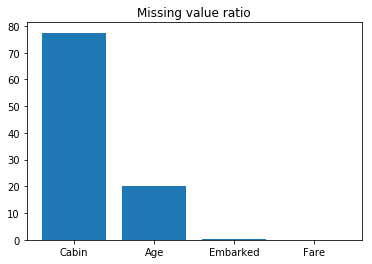

In [34]:
# Label of NaN feature
label = all_data_na.index

# ndarray of labels & and count of occurence of each labels
index = np.arange(len(label))
ratio = all_data_na

# Create bars
plt.bar(index, ratio)

# Create names on the x-axis
plt.xticks(index, label)
    
# Title of the plot
plt.title("Missing value ratio")

# Show graphic
plt.show()

**Imputing Missing Values**

- Cabin : I can not find an explanation to missing cabin. I choose to replace missing value by "U". This mean Unknown.
- Age : No meaning for missing Age value. Missing value for Age, can be aproximate using Title variable. Because Title change with Age. 
- Embarked : No meaning for missing Embarked value. Only 2 missing values. I will replace missing value by the city where most of passengers embarked.
- Fare : The missing Fare value concern Pclass 3 passenger. The class is highly correlated with the fare. I will use this variable to replace missing value. 

**Age**

In [35]:
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Mr'), 'Age']= all_data.Age[all_data.Title=="Mr"].mean()
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Mrs'), 'Age']= all_data.Age[all_data.Title=="Mrs"].mean()
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Master'), 'Age']= all_data.Age[all_data.Title=="Master"].mean()
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Miss'), 'Age']= all_data.Age[all_data.Title=="Miss"].mean()
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Other'), 'Age']= all_data.Age[all_data.Title=="Other"].mean()

all_data.Age = all_data.Age.astype(int)

In [36]:
all_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A5,7.2500,NaN,S,Mr,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC,71.2833,C85,C,Mrs,2
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STONO2,7.9250,NaN,S,Miss,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,XXX,53.1000,C123,S,Mrs,2
4,5,3,"Allen, Mr. William Henry",male,35,0,0,XXX,8.0500,NaN,S,Mr,1
5,6,3,"Moran, Mr. James",male,32,0,0,XXX,8.4583,NaN,Q,Mr,1
6,7,1,"McCarthy, Mr. Timothy J",male,54,0,0,XXX,51.8625,E46,S,Mr,1
7,8,3,"Palsson, Master. Gosta Leonard",male,2,3,1,XXX,21.0750,NaN,S,Master,5
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,XXX,11.1333,NaN,S,Mrs,3
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,XXX,30.0708,NaN,C,Mrs,2


**Fare**

In [37]:
all_data.loc[(all_data.Fare.isnull())&(all_data.Pclass==3), 'Fare'] = all_data.Fare[all_data.Pclass==3].mean()

**Cabin**

In [38]:
all_data.Cabin.fillna('U', inplace=True)

all_data['Cabin'] = all_data['Cabin'].map(lambda c: c[0])

'U' correspond to 'Unknown'

**Embarked**

In [39]:
all_data.loc[(61,829),'Embarked'] = "S"

In [40]:
# Check if there are any missing values left
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


## Drop column

In [41]:
all_data.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket'], inplace = True)

## Features engineering

### Sex 

In [42]:
all_data['Sex'] = all_data['Sex'].map({'male':1, 'female':0})

### Cabin

In [43]:
cabin_dummies = pd.get_dummies(all_data['Cabin'], prefix="Cabin")

all_data = pd.concat([all_data, cabin_dummies], axis=1)

all_data.drop('Cabin', axis=1, inplace=True)

### Embarked

In [44]:
embarked_dummies = pd.get_dummies(all_data['Embarked'], prefix="Embarked")

all_data = pd.concat([all_data, embarked_dummies], axis=1)

all_data.drop('Embarked', axis=1, inplace=True)

### Title

In [45]:
title_dummies = pd.get_dummies(all_data['Title'], prefix="Title")

all_data = pd.concat([all_data, title_dummies], axis=1)

all_data.drop('Title', axis=1, inplace=True)

In [46]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [47]:
from sklearn.model_selection import train_test_split

X = train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

# Machine Learning Models

In [48]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [49]:
from sklearn.metrics import accuracy_score

# Model initialisation
sgd = SGDClassifier(max_iter=5, tol=None)
clf_rf = RandomForestClassifier(criterion='entropy', n_estimators=1400, max_features='auto', max_depth = 10, min_samples_split=10, min_samples_leaf=1, bootstrap=True)
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 3) 
clf_GNB = GaussianNB() 
perceptron = Perceptron(max_iter=5)
decision_tree = DecisionTreeClassifier() 

# Parameters to test
parameters_sgd = {"max_iter": [1, 5, 10],
                  "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  "penalty": ["none", "l1", "l2"]
                 }

#parameters_rf = {"criterion" : ["gini", "entropy"],
#                 "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
#                 "max_features" : ['auto', 'sqrt'],
#                 "max_depth" : [int(x) for x in np.linspace(10, 110, num = 11)],
#                 "min_samples_split" : [2, 5, 10],
#                 "min_samples_leaf" : [1, 2, 4],
#                 "bootstrap" : [True, False]
#}

parameters_logreg = {'penalty':['l1', 'l2'],
                     'C':[0.0001, 0.001, 0.01, 1, 100]}

parameters_knn = {'n_neighbors':[5,6,7,8,9,10],
                  'leaf_size':[1,2,3,5],
                  'weights':['uniform', 'distance'],
                  'algorithm':['auto', 'ball_tree','kd_tree','brute'],
                  'n_jobs':[-1]
                 }

parameters_perceptron = {'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
                         'max_iter': [5, 10, 15, 20, 50]}

parameters_dt = {'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
                 'random_state':[123]
                }

# GridSearch application
clf_sgd = GridSearchCV(sgd, parameters_sgd, cv=5, iid=False)
#clf_rf = GridSearchCV(rf, parameters_rf, cv=5, iid=False)
clf_logreg = GridSearchCV(logreg, parameters_logreg, cv=5, iid=False)
clf_knn = GridSearchCV(knn, parameters_knn, cv=5, iid=False)
clf_perceptron = GridSearchCV(perceptron, parameters_perceptron, cv=5, iid=False)
clf_dt = GridSearchCV(decision_tree, parameters_dt, cv=5, iid=False)


# Models fitting
Best_Params_sgd= clf_sgd.fit(X_train, y_train)
Best_Params_rf= clf_rf.fit(X_train, y_train)
Best_Params_logreg= clf_logreg.fit(X_train, y_train)
Best_Params_knn= clf_knn.fit(X_train, y_train)
Best_Params_GNB= clf_GNB.fit(X_train, y_train)
Best_Params_perceptron= clf_perceptron.fit(X_train, y_train)
Best_Params_dt= clf_dt.fit(X_train, y_train)

# Accuracy train
ACC_sgd_tr = accuracy_score(y_train, Best_Params_sgd.predict(X_train))
ACC_rf_tr = accuracy_score(y_train, Best_Params_rf.predict(X_train))
ACC_logreg_tr = accuracy_score(y_train, Best_Params_logreg.predict(X_train))
ACC_knn_tr = accuracy_score(y_train, Best_Params_knn.predict(X_train))
ACC_GNB_tr = accuracy_score(y_train, Best_Params_GNB.predict(X_train))
ACC_perceptron_tr = accuracy_score(y_train, Best_Params_perceptron.predict(X_train))
ACC_dt_tr = accuracy_score(y_train, Best_Params_dt.predict(X_train))


# Accuracy test
ACC_sgd_te = accuracy_score(y_test, Best_Params_sgd.predict(X_test))
ACC_rf_te = accuracy_score(y_test, Best_Params_rf.predict(X_test))
ACC_logreg_te = accuracy_score(y_test, Best_Params_logreg.predict(X_test))
ACC_knn_te = accuracy_score(y_test, Best_Params_knn.predict(X_test))
ACC_GNB_te = accuracy_score(y_test, Best_Params_GNB.predict(X_test))
ACC_perceptron_te = accuracy_score(y_test, Best_Params_perceptron.predict(X_test))
ACC_dt_te = accuracy_score(y_test, Best_Params_dt.predict(X_test))

## Score comparison

In [50]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Train mean accuracy': [ACC_knn_tr, ACC_logreg_tr, 
              ACC_rf_tr, ACC_GNB_tr, ACC_perceptron_tr, 
              ACC_sgd_tr, ACC_dt_tr],
    'Test mean accuracy': [ACC_knn_te, ACC_logreg_te, 
              ACC_rf_te, ACC_GNB_te, ACC_perceptron_te, 
              ACC_sgd_te, ACC_dt_te]})
result_df = results.sort_values(by='Test mean accuracy', ascending=False)
result_df = result_df.set_index(['Train mean accuracy', 'Test mean accuracy'])
result_df

,,Model
Train mean accuracy,Test mean accuracy,
0.845907,0.824627,Logistic Regression
0.900482,0.813433,Random Forest
0.874799,0.805970,Decision Tree
0.767255,0.798507,Naive Bayes
0.800963,0.791045,Stochastic Gradient Decent
0.982343,0.720149,KNN
0.643660,0.608209,Perceptron


## Feature Importance

In [51]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

model = LogisticRegression()

Accuracy_tab_tr = []
Accuracy_tab_te = []

for i in range(1,23):

    rfe = RFE(model, i) 

    rfe.fit(X_train, y_train)
    
    pred_train = rfe.predict(X_train)
    pred_test = rfe.predict(X_test)
    
    Accuracy_tab_tr.append(accuracy_score(y_train, pred_train))
    Accuracy_tab_te.append(accuracy_score(y_test, pred_test))
    
print("Optimal number of features : %d" % rfe.n_features_)

Optimal number of features : 22


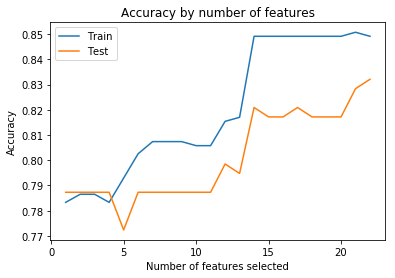

In [53]:
plt.plot(range(1,23), Accuracy_tab_tr, label='Train')
plt.plot(range(1,23), Accuracy_tab_te, label='Test')
plt.xlabel('Number of features selected')
plt.ylabel('Accuracy')
plt.title('Accuracy by number of features')
plt.legend()
plt.show()